   # **HEART DISEASES DETECTION**

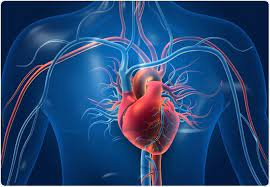

# **Importing libraries**

In [ ]:
import pandas as pd
import ydata_profiling as yp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Attribute Information:**
* Age
* Sex (M,F)
* ChestPainType = Chest pain type (ASY,NAP,ATA,TA)
* RestingBP = resting blood pressure
* Cholesterol in mg/dl
* FastingBS = fasting blood sugar > 120 mg/dl (0,1)
* RestingECG = resting electrocardiographic results (Normal,ST,LVH)
* MaxHR = maximum heart rate achieved
* ExerciseAngina = exercise induced angina (N,Y)
* Oldpeak = ST depression induced by exercise relative to rest
* ST_Slope = the slope of the peak exercise ST segment (Flat,Up,Down)
 **Target variable:**
* HeartDisease = target:0 for no presence of heart disease, 1 for presence of heart disease

# **Importing and Displaying Dataset**

In [ ]:
df = pd.read_csv('/kaggle/input/heart-ds/heart.csv')
df

# **Exploratory Data Analysis Using Pandas Profiling**

In [ ]:
yp.ProfileReport(df, title = 'Pandas Profiling report of "dataset"', html = {'style':{'full_width': True}})

# **Exploratory Data Analysis**

> **Shape of Dataset**

In [ ]:
print("The Shape Of Dataset:",df.shape)
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

> **Columns of Dataset**

In [ ]:
df.columns

> **Get Overall Statistics About The Dataset**

In [ ]:
df.describe()

> **Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [ ]:
df.info()

>  **Checking NULL values**

In [ ]:
df.isnull().sum()

> **Checking Duplicates**

In [ ]:
df.duplicated().sum()

> **Encoding Categorical Attributes**

1. **Method 1**

In [ ]:
#The get_dummies function is used to convert categorical variables into dummy or indicator variables.
#pd.get_dummies(data, columns)

2. **Method2**

In [ ]:
print(df['Sex'].value_counts(),'\n')
print(df['ChestPainType'].value_counts(),'\n')
print(df['RestingECG'].value_counts(),'\n')
print(df['ExerciseAngina'].value_counts(),'\n')
print(df['ST_Slope'].value_counts(),'\n')

In [ ]:
df.replace({'Sex':{'M':0,'F':1}},inplace=True)
df.replace({'ChestPainType':{'ASY':0,'NAP':1,'ATA':2,'TA':3}},inplace=True)
df.replace({'RestingECG':{'Normal':0,'ST':1,'LVH':2}},inplace=True)
df.replace({'ExerciseAngina':{'N':0,'Y':1}},inplace=True)
df.replace({'ST_Slope':{'Flat':0,'Up':1,'Down':2}},inplace=True)

In [ ]:
print(df['Sex'].value_counts(),'\n')
print(df['ChestPainType'].value_counts(),'\n')
print(df['RestingECG'].value_counts(),'\n')
print(df['ExerciseAngina'].value_counts(),'\n')
print(df['ST_Slope'].value_counts(),'\n')

In [ ]:
df

> **Draw Correlation Matrix**

In [ ]:
plt.figure(figsize = (8,10))
sns.heatmap(df.corr(),annot = True)

> **Histogram**

In [ ]:
df.hist()
plt.tight_layout()

> **Check data distribution For Numerical Columns**

In [ ]:
df2 = df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','HeartDisease','ST_Slope','FastingBS'], axis= 1)
df2.hist()
plt.tight_layout()

> **Count of Heart Disease people and Don't Have Heart Disease**

In [ ]:
df['HeartDisease'].value_counts()

In [ ]:
df['HeartDisease'].hist()
plt.show()

**The dataset is balanced having 485 heart disease patients and 379 normal patients**

> **Boxplot**

In [ ]:
plt.figure(figsize = (8,6))
sns.boxplot(df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','HeartDisease','ST_Slope'], axis= 1))
plt.show()

> **Removing outliers**

In [ ]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df['RestingBP']>=upper)[0]
lower_array = np.where(df['RestingBP']<=lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

> **Data Normalization**

In [ ]:
x = df.drop(["HeartDisease"], axis=1)
x = StandardScaler().fit_transform(x)

# **Machine Learning**

> **Seperating target from the other features**

In [ ]:
X = df.drop(columns = 'HeartDisease',axis = 1)
Y = df['HeartDisease']

In [ ]:
X

In [ ]:
Y

> **Spliting Data to Train Data and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3,random_state=42)

> **Bagging Classifier UsinG Random Forest Classifier**

In [ ]:
RF=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

In [ ]:
CV_RF = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,return_train_score = True)
CV_RF.fit(X_train, y_train)

In [ ]:
print("The Best Paramter: ",CV_RF.best_params_)
print("The Best Score: ",CV_RF.best_score_)

In [ ]:
RF1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')

In [ ]:
model = BaggingClassifier(RF1, n_estimators=1000)
classifiers = model.fit(X_train, y_train)

In [ ]:
print(model.score(X_train, y_train),'\n',model.score(X_test, y_test))

In [ ]:
y_pred = model.predict(X_test)
y_pred

> **Classification Report of Random Forest Classifier**

In [ ]:
print(classification_report(y_test,model.predict(X_test)))

> **ROC Curve**

In [ ]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

> **AUC Curve**

In [ ]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label = 'AUC'+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Importing and Displaying Hidden Test Dataset**

In [ ]:
df2 = pd.read_csv('/kaggle/input/hidden-test-ds/heart_test_hidden.csv')
df2

> **Encoding Categorical Attributes**

In [ ]:
print(df2['Sex'].value_counts(),'\n')
print(df2['ChestPainType'].value_counts(),'\n')
print(df2['RestingECG'].value_counts(),'\n')
print(df2['ExerciseAngina'].value_counts(),'\n')
print(df2['ST_Slope'].value_counts(),'\n')

In [ ]:
df2.replace({'Sex':{'M':0,'F':1}},inplace=True)
df2.replace({'ChestPainType':{'ASY':0,'NAP':1,'ATA':2,'TA':3}},inplace=True)
df2.replace({'RestingECG':{'Normal':0,'ST':1,'LVH':2}},inplace=True)
df2.replace({'ExerciseAngina':{'N':0,'Y':1}},inplace=True)
df2.replace({'ST_Slope':{'Flat':0,'Up':1,'Down':2}},inplace=True)

In [ ]:
print(df2['Sex'].value_counts(),'\n')
print(df2['ChestPainType'].value_counts(),'\n')
print(df2['RestingECG'].value_counts(),'\n')
print(df2['ExerciseAngina'].value_counts(),'\n')
print(df2['ST_Slope'].value_counts(),'\n')

In [ ]:
df2

In [ ]:
BAG_PREDICT = model.predict(df2)
print(BAG_PREDICT)

In [ ]:
PREDICTION = pd.DataFrame(BAG_PREDICT)
PREDICTION

In [ ]:
PREDICTION.to_csv('prediction_Aya.csv',index = False)